In [38]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [39]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [40]:
len(x_train)

60000

In [41]:
len(x_test)

10000

In [42]:
x_train[0].shape

(28, 28)

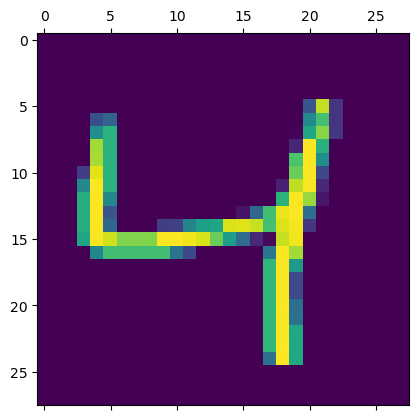

In [43]:
plt.matshow(x_train[2])

In [44]:
x_train=x_train /255
x_test=x_test /255

In [45]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [46]:
x_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [47]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4650 - accuracy: 0.8796
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2665 - accuracy: 0.9255


In [48]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2693 - accuracy: 0.9264


[0.2693071961402893, 0.9264000058174133]

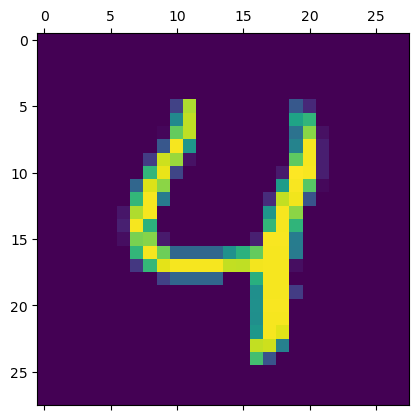

In [49]:
plt.matshow(x_test[4])

In [50]:
y_predicted=model.predict(x_test_flattened)
y_predicted[4]

313/313 [==============================] - 0s 1ms/step


array([6.0256105e-02, 4.3250391e-05, 2.3466496e-01, 5.4386738e-03,
       9.8872072e-01, 1.0551450e-02, 1.4954545e-01, 2.7165261e-01,
       3.1247872e-01, 7.4589729e-01], dtype=float32)

In [51]:
np.argmax(y_predicted[4])

4

In [52]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [53]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

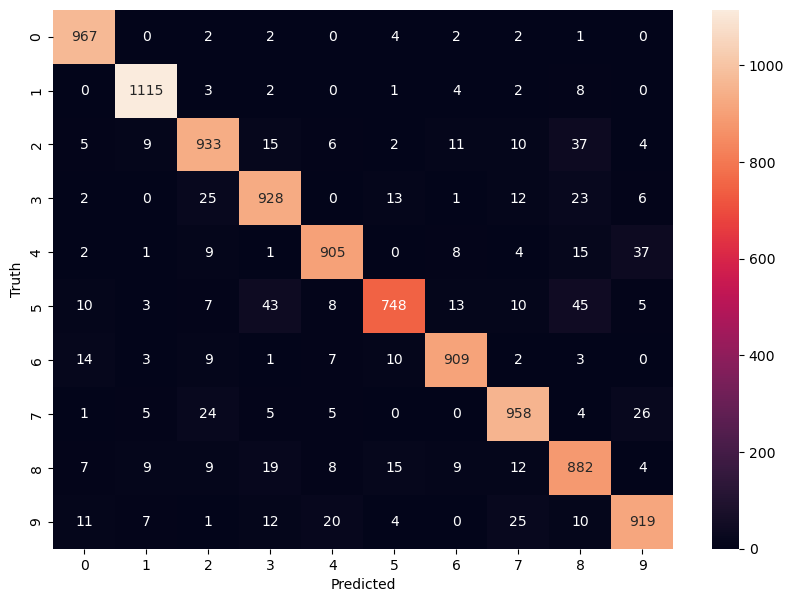

In [ ]:


import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2776 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2776 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1278 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1278 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0894 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0894 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0684 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0539 - accuracy: 0.9834


In [56]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9750


[0.08532475680112839, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

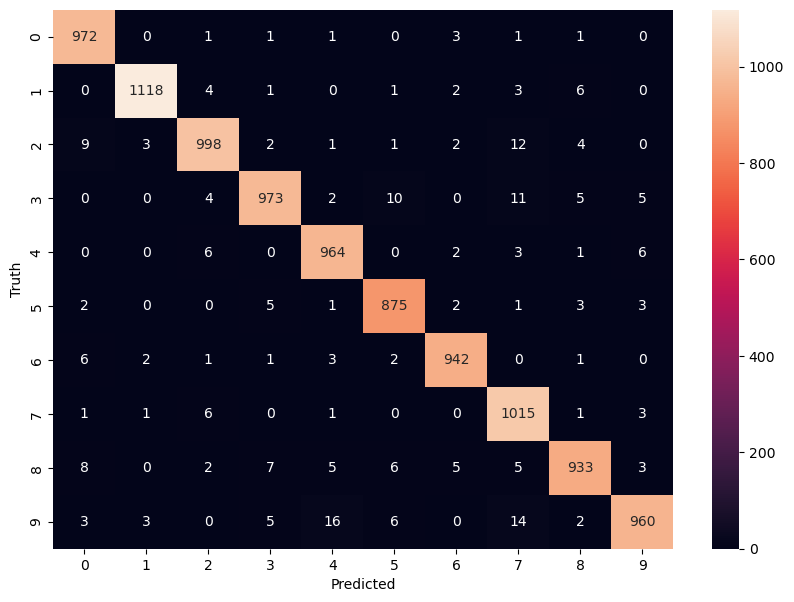

In [57]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [58]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4136 - accuracy: 0.8950
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4136 - accuracy: 0.8950
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2014 - accuracy: 0.9414
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2014 - accuracy: 0.9414
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1501 - accuracy: 0.9569
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1501 - accuracy: 0.9569
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1181 - accuracy: 0.9663
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1181 - accuracy: 0.9663
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0970 - accuracy: 0.9724
